# Tutorial

## Import modules

This tutorial describes how you can detect sequences in multi-neuronal spiking activity data.

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
from spykesim import editsim
from gendata import gendata
from scipy.ndimage.filters import gaussian_filter1d
from tqdm import tqdm
%matplotlib inline

/Users/kei/.pyenv/versions/anaconda3-5.2.0/envs/spykesim/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/kei/.pyenv/versions/anaconda3-5.2.0/envs/spykesim/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import spykesim

In [3]:
df, binmat = gendata()

Text(0, 0.5, 'Neuron#')

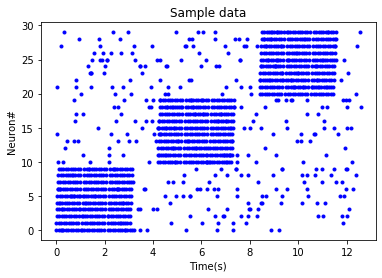

In [4]:
plt.plot(df.spiketime, df.neuronid, "b.")
plt.title("Sample data")
plt.xlabel("Time(s)")
plt.ylabel("Neuron#")

If you would like to calculate the edit similarity between two partial neuronal activity data, you may use the function `_sim`:

# Edit similarity calculation

In [5]:
a = 0.001
es = editsim.FromBinMat(alpha=a)

In [6]:
mat1 = binmat[:, 0:200].toarray()
mat2 = binmat[:, 200:400].toarray()
sim, _, _, _ = es._sim(mat1, mat2)
print(f"The edit similarity between mat1 and mat2 is {sim}")

The edit similarity between mat1 and mat2 is 19.64182094031858


Or, if you want to divide the original neuronal data into the same length of segments and calculate the similarity matrix, you can do like follows:

In [7]:
window = 100 # ms
es.gensimmat(
    binmat, window=window, slide=window, numband=4, bandwidth=5, minhash=False
)

[2019-09-15 14:17:55,184] [MainThread] Execution of a function gensimmat starts
[2019-09-15 14:17:55,185] [MainThread] Execution of a function _eval_simvec starts
[2019-09-15 14:17:55,943] [MainThread] submit end
[2019-09-15 14:17:55,950] [MainThread] Progress of the calculation
100%|██████████| 133/133 [00:02<00:00, 46.0it/s] 
[2019-09-15 14:17:58,878] [MainThread] Progress of the aggregation
133it [00:00, 95097.58it/s]
[2019-09-15 14:17:58,883] [MainThread] calculation end


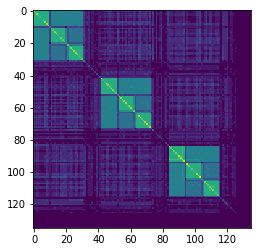

In [8]:
plt.imshow(es.simmat)

# Clustering

You can clustering the segments using the simirality matrix:

In [9]:
es.clustering(min_cluster_size=10)

In [10]:
es.cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [11]:
es.gen_profile()

100%|██████████| 59/59 [00:01<00:00, 49.12it/s]


Below shows profiles that represents repeatedly-appeared spatiotemporal structures in the data.

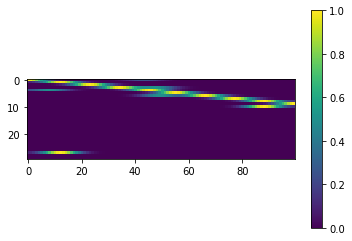

In [12]:
plt.imshow(es.profiles[0])
plt.colorbar()

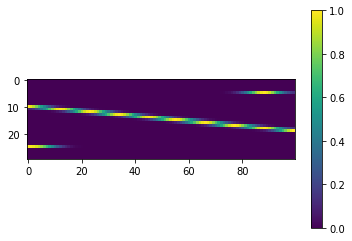

In [13]:
plt.imshow(es.profiles[1])
plt.colorbar()

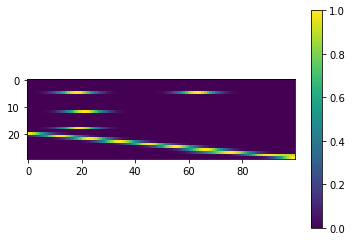

In [30]:
plt.imshow(es.profiles[3])
plt.colorbar()

## Detect Sequences

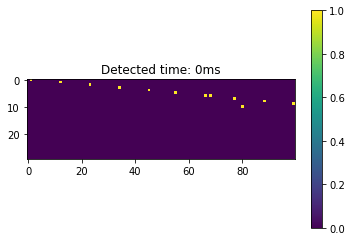

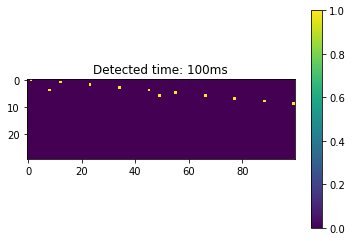

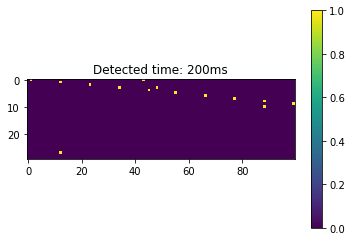

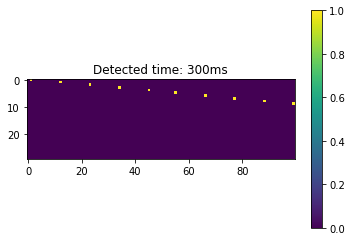

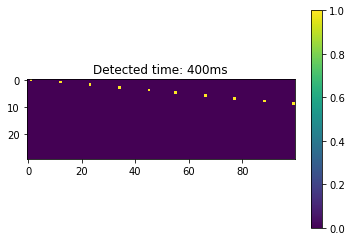

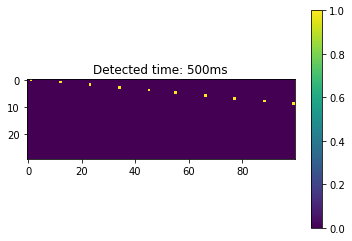

In [33]:
sequence_dict = es.detect_sequences(cluster_id=0, th=5)
for i, (idx, mat) in enumerate(sequence_dict.items()):
    plt.imshow(mat, interpolation="nearest")
    plt.title(f"Detected time: {idx}ms")
    plt.colorbar()
    plt.show()
    if i >= 5:
        break

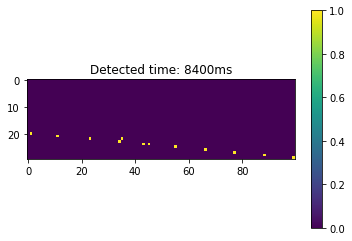

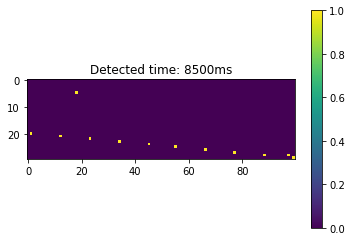

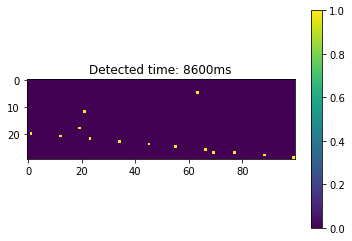

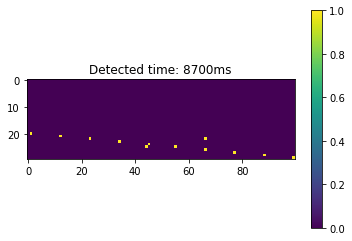

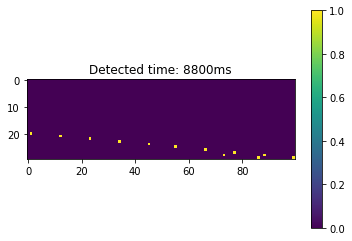

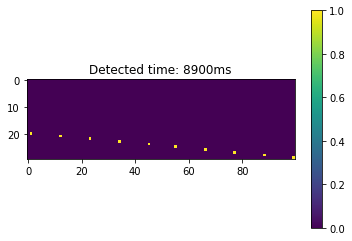

In [34]:
sequence_dict = es.detect_sequences(cluster_id=3, th=5)
for i, (idx, mat) in enumerate(sequence_dict.items()):
    plt.imshow(mat, interpolation="nearest")
    plt.title(f"Detected time: {idx}ms")
    plt.colorbar()
    plt.show()
    if i >= 5:
        break